In [2]:
import pandas as pd
df=pd.read_pickle("/content/2_CarPricesData.pkl")

In [3]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [4]:
df.isnull().sum()

,0
Age,0
KM,0
Weight,0
HP,0
MetColor,0
CC,0
Doors,0
Price,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','KM','Weight','HP','CC']]=scaler.fit_transform(df[['Age','KM','Weight','HP','CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


<Axes: >

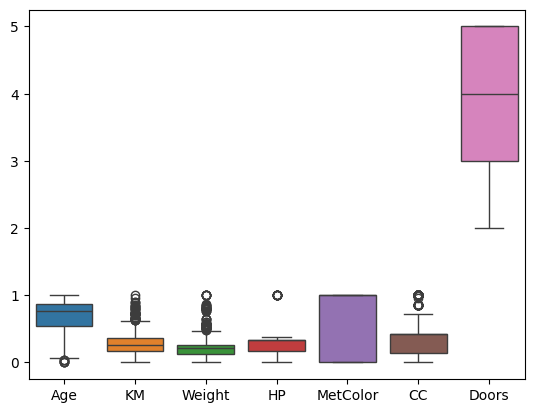

In [6]:
import seaborn as sns
sns.boxplot(df.iloc[:,:-1])

In [22]:

Q1 = df[['Age','KM','Weight','HP','CC']].quantile(0.25)
Q3 = df[['Age','KM','Weight','HP','CC']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df[['Age','KM','Weight','HP','CC']] = df[['Age','KM','Weight','HP','CC']].clip(lower=lower_bound, upper=upper_bound, axis=1)

<Axes: >

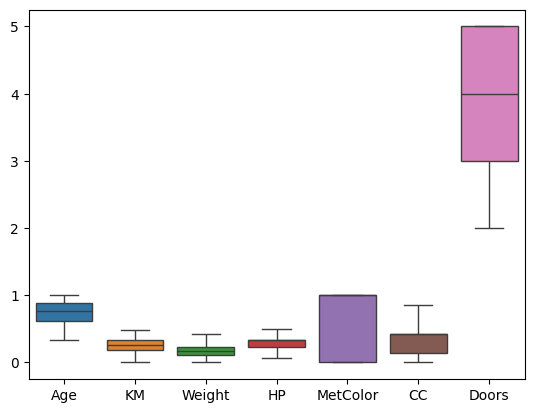

In [23]:
sns.boxplot(df.iloc[:,:-1])

In [24]:
y=df['Price']
x=df.drop('Price',axis=1)

In [25]:
df.dropna(inplace=True)

In [26]:
from keras import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=16,input_dim=7,kernel_initializer='random_uniform' ,activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64,activation='linear'))#regression activation default


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840 (15.00 KB)

 Trainable params: 3,840 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model.fit(x_train,y_train,epochs=50,batch_size=20, validation_split=0.2,verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 109427408.0000 - mse: 109427408.0000 - val_loss: 107111440.0000 - val_mse: 107111440.0000
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 110009152.0000 - mse: 110009152.0000 - val_loss: 107042496.0000 - val_mse: 107042496.0000
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104147136.0000 - mse: 104147136.0000 - val_loss: 106693344.0000 - val_mse: 106693344.0000
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108343456.0000 - mse: 108343456.0000 - val_loss: 105560112.0000 - val_mse: 105560112.0000
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104291072.0000 - mse: 104291072.0000 - val_loss: 102787104.0000 - val_mse: 102787104.0000
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 101384744.0000 - mse: 101384744.0000 - val_loss: 97209256.0000 - val_mse: 97209256.0000
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95386232.0000 - mse: 95386232.0000 - val_loss: 87638816

In [29]:
model.evaluate(x_test,y_test)

ValueError: You must call `compile()` before using the model.

In [18]:
y=df['Price']
x=df.drop('Price',axis=1)
